In [93]:
import sys
import regions
import pyavm
import numpy as np
import PIL

from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm

import reproject 
from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u

from reproject import reproject_interp

from spectral_cube import SpectralCube
from spectral_cube import Projection

import regions

from astropy.visualization.wcsaxes import add_scalebar

In [2]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

In [3]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

In [4]:
def save_rgb(img, filename, flip=-1):
    img = (img*256)
    img[img<0] = 0
    img[img>255] = 255
    img = img.astype('uint8')
    img = PIL.Image.fromarray(img[::flip,:,:])
    img.save(filename)

In [5]:
def get_cutout(filename, position, l, w, format='fits'):
    if format == 'fits':
        try: 
            hdu = fits.open(filename, ext='SCI')[0]
        except: 
            hdu = fits.open(filename)[0]
    elif format == 'casa':
        hdu = SpectralCube.read(filename, format='casa').hdu
    data = np.squeeze(hdu.data)
    head = hdu.header

    #pixel_scale = head['PIXSCALE']*u.arcsec/u.pix
    ww = WCS(head).celestial
    size = (l, w)
    #((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
    cutout = Cutout2D(data, position=position, size=size, wcs=ww)
    return cutout


In [6]:
ls /orange/adamginsburg/jwst/cloudc/images/*merged-fortricolor.fits

/orange/adamginsburg/jwst/cloudc/images/F182_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F212_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F410_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F466_reproj_merged-fortricolor.fits


# F405N and F466N

In [4]:
rgb_withstars = np.array(
      [
       fits.getdata(f'{basepath}/images/F466_reproj_merged-fortricolor.fits'),
       fits.getdata(f'{basepath}/images/F405_reproj_merged-fortricolor.fits'),
      ]
).swapaxes(0,2).swapaxes(0,1)

In [5]:
#AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits'))
AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F405_reproj_merged-fortricolor.fits'))

In [ ]:
narrowsum_withstars = rgb_withstars[:,:,0] + rgb_withstars[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb_withstars[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb_withstars[:,:,0]),
                       simple_norm(narrowsum_withstars,  stretch='asinh', min_cut=-2, max_cut=210)(narrowsum_withstars),
                       simple_norm(rgb_withstars[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb_withstars[:,:,1]),
]).swapaxes(0,2).swapaxes(0,1)
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += -0.35  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)
plt.figure(figsize=(24,10))
plt.imshow(rgb_scaled, origin='lower')
plt.xticks([]);
plt.yticks([]);

outfn = f"{basepath}/images/cloudcJWST_merged_longwave_narrowband_rotated_withstars.png"
save_rgb(rgb_scaled.swapaxes(0,1), outfn, flip=1)
AVM.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


# F405N and F410M

In [5]:
ls /orange/adamginsburg/jwst/cloudc/images/*fortricolor.fits

/orange/adamginsburg/jwst/cloudc/images/F182_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F212_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F410_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F466_reproj_merged-fortricolor.fits


In [6]:
rgb_withstars = np.array(
      [
       fits.getdata(f'{basepath}/images/F410_reproj_merged-fortricolor.fits'),
       fits.getdata(f'{basepath}/images/F405_reproj_merged-fortricolor.fits'),
      ]
).swapaxes(0,2).swapaxes(0,1)

In [7]:
AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F405_reproj_merged-fortricolor.fits'))

In [ ]:
narrowsum_withstars = rgb_withstars[:,:,0] + rgb_withstars[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb_withstars[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb_withstars[:,:,0]),
                       simple_norm(narrowsum_withstars,  stretch='asinh', min_cut=-2, max_cut=210)(narrowsum_withstars),
                       simple_norm(rgb_withstars[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb_withstars[:,:,1]),
]).swapaxes(0,2).swapaxes(0,1)
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += -0.35  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)
plt.figure(figsize=(24,10))
plt.imshow(rgb_scaled, origin='lower')
plt.xticks([]);
plt.yticks([]);

#outfn = f"{basepath}/images/cloudcJWST_merged_f212-f405_rotated_withstars.png"
#save_rgb(rgb_scaled.swapaxes(0,1), outfn, flip=1)
#AVM.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


# Spitzer Glimpse

In [105]:
ls /orange/adamginsburg/cmz/glimpse_data/*.fits

/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I1.fits
/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits
/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits
/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits


In [106]:
data_glimpse = np.array( # 3.6, 4.5, 5.8, 8
    [
    fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I1.fits'),
    #fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits'),
    fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits'),
    fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits'),
    ]
).swapaxes(0,2).swapaxes(0,1)

In [107]:
data_glimpse.shape

(13520, 9320, 3)

In [108]:
position = SkyCoord('17:46:21.4701708277', '-28:35:38.0673181068', unit=(u.hourangle, u.deg))

In [109]:
l = 7*u.arcmin
w = 10*u.arcmin

In [110]:
hdu = fits.open('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I1.fits')[0]
data = hdu.data
head = hdu.header
#ww, shape = reproject.mosaicking.find_optimal_celestial_wcs(hdu)
#array, footprint = reproject_interp(hdu, ww, shape_out=shape)
#head1 = head.copy().update(ww.to_header())

pixel_scale = head['PIXSCAL1']*u.arcsec/u.pix
ww = WCS(head)
size = ((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
cutout_I1 = Cutout2D(data, position=position, size=size, wcs=ww)

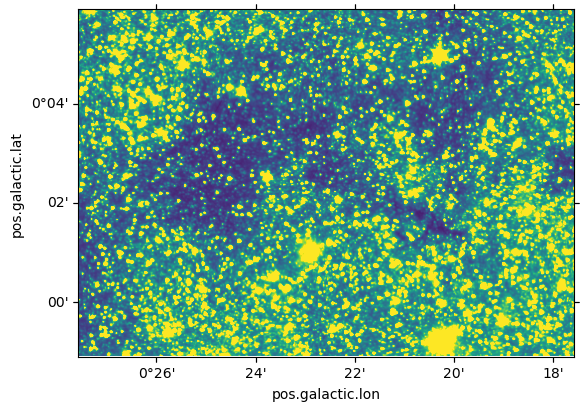

In [111]:
ax = plt.subplot(111, projection=cutout_I1.wcs)
ax.imshow(np.nan_to_num(cutout_I1.data), vmin=0, vmax=50)

In [112]:
data = fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits')
head = fits.getheader('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits')
pixel_scale = head['PIXSCAL1']*u.arcsec/u.pix
ww = WCS(head)
size = ((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
cutout_I2 = Cutout2D(data, position=position, size=size, wcs=ww)

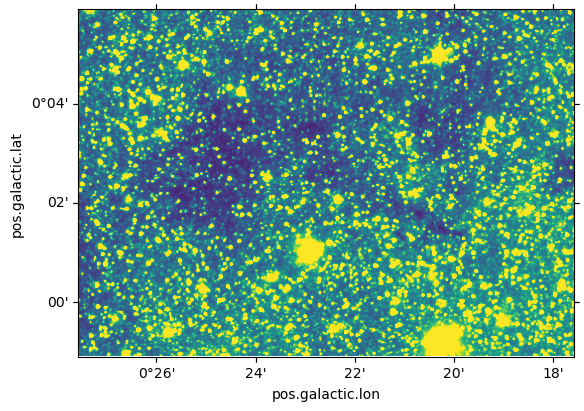

In [113]:
ax = plt.subplot(111, projection=cutout_I2.wcs)
ax.imshow(np.nan_to_num(cutout_I2.data), vmin=0, vmax=50)

In [114]:
data = fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits')
head = fits.getheader('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits')
pixel_scale = head['PIXSCAL1']*u.arcsec/u.pix
ww = WCS(head)
size = ((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
cutout_I3 = Cutout2D(data, position=position, size=size, wcs=ww)

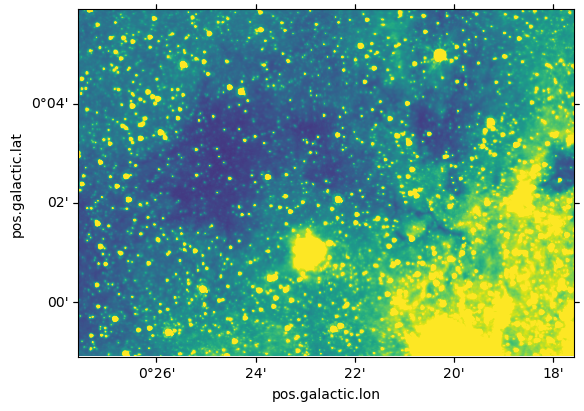

In [115]:
ax = plt.subplot(111, projection=cutout_I3.wcs)
ax.imshow(np.nan_to_num(cutout_I3.data), vmin=0, vmax=150)

In [188]:
data = fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits')
head = fits.getheader('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits')
pixel_scale = head['PIXSCAL1']*u.arcsec/u.pix
ww = WCS(head)
size = (l, w)#((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
cutout_I4 = Cutout2D(data, position=position, size=size, wcs=ww)

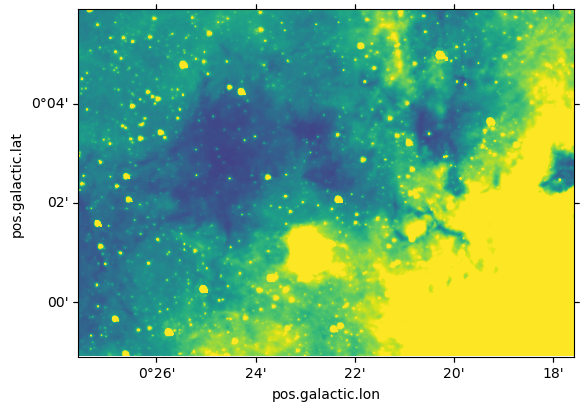

In [189]:
ax = plt.subplot(111, projection=cutout_I4.wcs)
ax.imshow(np.nan_to_num(cutout_I4.data), vmin=0, vmax=250)

In [196]:
rgb = np.array(
    [
        cutout_I1.data,
        cutout_I3.data,
        cutout_I4.data
    ]
).swapaxes(0,2).swapaxes(0,1)

In [119]:
reg = regions.Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/f4_fov_cloudc.reg', format='ds9')
reg[0]

<PolygonSkyRegion(vertices=<SkyCoord (Galactic): (l, b) in deg
    [(0.45245328,  5.5501139e-02), (0.41932096,  3.9406575e-02),
     (0.41858536,  4.0778645e-02), (0.40789371,  3.5590006e-02),
     (0.40835791,  3.4634603e-02), (0.3750061 ,  1.8565592e-02),
     (0.37425317,  2.0071614e-02), (0.35786572,  1.2277669e-02),
     (0.3568859 ,  1.3574056e-02), (0.3411927 ,  6.3746740e-03),
     (0.34060481,  7.6503910e-03), (0.32386116, -3.7923000e-05),
     (0.30833097,  3.3074869e-02), (0.34084179,  4.8843098e-02),
     (0.34154638,  4.7225097e-02), (0.35290478,  5.2995442e-02),
     (0.35245385,  5.3871907e-02), (0.38480973,  6.9488769e-02),
     (0.38550602,  6.7938639e-02), (0.40221769,  7.6070800e-02),
     (0.40306347,  7.4256347e-02), (0.41854142,  8.1673990e-02),
     (0.41945686,  8.0423014e-02), (0.43591105,  8.8415852e-02)]>)>

In [120]:
reg_cloudd = regions.RectangleSkyRegion(SkyCoord('17:46:22.7853', '-28:32:38.873', unit=(u.hourangle, u.deg)), width=2.6*u.arcmin, height=2.16*u.arcmin, angle=-82.56212*u.deg)
reg_filamt = regions.RectangleSkyRegion(SkyCoord('17:46:19.2561', '-28:37:46.916', unit=(u.hourangle, u.deg)), width=2.6*u.arcmin, height=2.16*u.arcmin, angle=-83.14829*u.deg)
#regions.RectangleSkyRegion(SkyCoord('17:46:19.4803', '-28:37:38.062', unit=(u.hourangle, u.deg)), width=2.6*u.arcmin, height=2.16*u.arcmin, angle=-83.26232*u.deg)
reg_cloudc = regions.RectangleSkyRegion(SkyCoord('17:46:19.6159', '-28:35:09.012', unit=(u.hourangle, u.deg)), width=2.6*u.arcmin, height=2.16*u.arcmin, angle=274.19046*u.deg)

In [121]:
reg_circ = regions.CircleSkyRegion(SkyCoord('17:46:22.950', '-28:33:23.450', unit=(u.hourangle, u.deg)), radius=25.714*u.arcsec/2)
reg_circ2 = regions.CircleSkyRegion(SkyCoord('17:46:21.304', '-28:35:40.502', unit=(u.hourangle, u.deg)), radius=25.714*u.arcsec/2)

In [181]:
#HMSFR
position_hmsfr = SkyCoord('17:46:21.4695266413', '-28:35:38.2082071644', unit=(u.hourangle, u.deg))
# SF in Cloud C2
position_clC1 = SkyCoord('17:46:18.4920068258', '-28:34:49.0614077917', unit=(u.hourangle, u.deg))
# SF behind that one star
position_clC2 = SkyCoord('17:46:23.0081808688', '-28:34:47.0566138394', unit=(u.hourangle, u.deg))
# SF behind that one star 2
position_clC3 = SkyCoord('17:46:23.7326242895', '-28:34:39.1357314298', unit=(u.hourangle, u.deg))
# Smudge
position_smudge = SkyCoord('17:46:23.6165518320', '-28:36:43.1017355842', unit=(u.hourangle, u.deg))
## YSO Candidate 1
position_yso1 = SkyCoord('17:46:18.3784399622', '-28:38:23.6340539472', unit=(u.hourangle, u.deg))
## YSO Candidate 2
position_yso2 = SkyCoord('17:46:16.6406193258', '-28:38:31.8976718744', unit=(u.hourangle, u.deg))
## Filament big outflows
position_fil1 = SkyCoord('17:46:19.2113428043', '-28:38:29.2785051504', unit=(u.hourangle, u.deg))
## Filament small outflows
position_fil2 = SkyCoord('17:46:19.5864088390', '-28:38:09.9985777000', unit=(u.hourangle, u.deg))
## Filament questionable
position_fil3 = SkyCoord('17:46:19.4739277108', '-28:38:39.6579995650', unit=(u.hourangle, u.deg))
## Filament low dude
position_fil4 = SkyCoord('17:46:22.0269097587', '-28:37:41.2057859327', unit=(u.hourangle, u.deg))
## Filament questionable
position_fil5 = SkyCoord('17:46:19.6173539108', '-28:37:29.4984352137', unit=(u.hourangle, u.deg))
## cloud D 1 
position_clD1 = SkyCoord('17:46:22.9436899632', '-28:33:23.7193298676', unit=(u.hourangle, u.deg))
## cloud D 1 
position_clD2 = SkyCoord('17:46:23.8031011850', '-28:33:39.3373914221', unit=(u.hourangle, u.deg))
## cloud D 1 
position_clD3 = SkyCoord('17:46:24.2445317597', '-28:33:30.2861614362', unit=(u.hourangle, u.deg))
## cloud D 1 
position_clD4 = SkyCoord('17:46:25.2852748572', '-28:33:27.4212271443', unit=(u.hourangle, u.deg))
## cloud D 1 
position_clD5 = SkyCoord('17:46:26.0494891125', '-28:33:39.4129992631', unit=(u.hourangle, u.deg))
## cloud D
position_clD5 = SkyCoord('17:46:24.5095970524', '-28:33:23.9562702628', unit=(u.hourangle, u.deg))
# cloud B? 
position_clB1 = SkyCoord('17:46:16.1108137557', '-28:38:02.5415343413', unit=(u.hourangle, u.deg))

yso_candidates = [position_hmsfr, position_clC1, position_clC2, position_clC3, position_smudge, position_yso1, 
                  position_yso2, position_fil1, position_fil2, position_fil3, position_fil4, position_clB1,
                  position_fil5, position_clD1, position_clD2, position_clD3, position_clD4, position_clD5]

In [182]:
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,-1], stretch='linear', min_cut=10, max_cut=350)(rgb[:,:,-1]), # 350
                       simple_norm(rgb[:,:,-2], stretch='linear', min_cut=10, max_cut=200)(rgb[:,:,-2]), # 200
                       simple_norm(rgb[:,:,-3], stretch='linear', min_cut=10, max_cut=100)(rgb[:,:,-3]), # 100
]).swapaxes(0,2).swapaxes(0,1)
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += -0.35  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)

In [183]:
ls /orange/adamginsburg/jwst/cloudc/code/proposals/2024

core.python-7-1712069561-21287-3389-c0704a-s4.ufhpc.3095690
figures.ipynb
hmsfr_2color_B6contours.pdf
smudge_2color_B6contours.pdf
spitzer_3color.pdf


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/blue/adamginsburg/adamginsburg/miniconda3/envs/python39savannah/lib/python3.9/site-packages/regions/shapes/polygon.py:181: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Polygon(xy=xy, **mpl_kwargs)


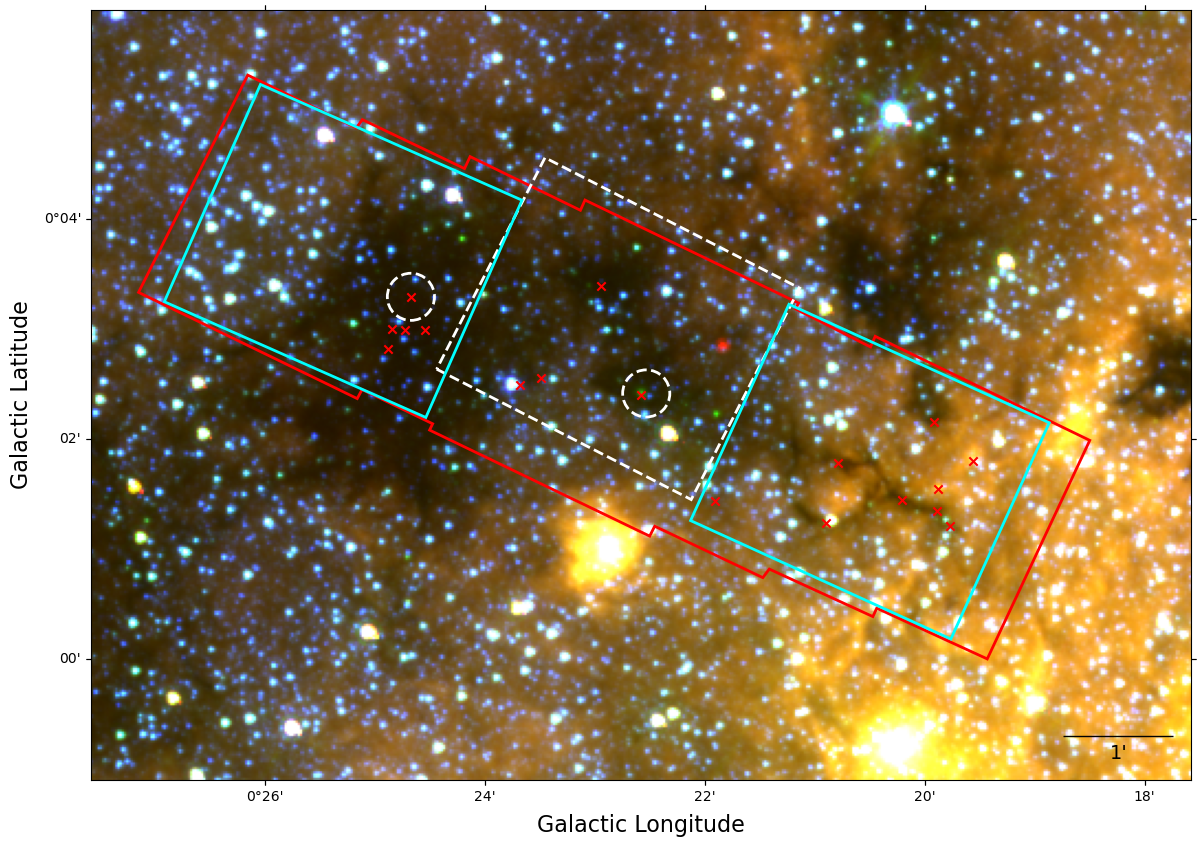

In [359]:
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=cutout_I1.wcs)
ax.imshow(rgb_scaled)#, origin='lower')
pixel_region = reg[0].to_pixel(cutout_I1.wcs)
pixel_region.plot(color='red')
reg_cloudc.to_pixel(cutout_I1.wcs).plot(color='white', linestyle='--', linewidth=2)
reg_circ.to_pixel(cutout_I1.wcs).plot(color='white', linestyle='--', linewidth=2)
reg_circ2.to_pixel(cutout_I1.wcs).plot(color='white', linestyle='--', linewidth=2)
reg_cloudd.to_pixel(cutout_I1.wcs).plot(color='cyan', linewidth=2)
reg_filamt.to_pixel(cutout_I1.wcs).plot(color='cyan', linewidth=2)

for yso in yso_candidates:
    ax.scatter(yso.to_pixel(cutout_I1.wcs)[0], yso.to_pixel(cutout_I1.wcs)[1], color='red', marker='x', zorder=2)

##ax.scatter(position_smudge.ra, position_smudge.dec, transform=ax.get_transform('world'), color='red', marker='x')
#plt.xticks([]);
#plt.yticks([]);
ax.set_ylabel('Galactic Latitude', fontsize=16)
ax.set_xlabel('Galactic Longitude', fontsize=16)

add_scalebar(ax, u.Quantity(1*u.arcmin), label="1'", color='k', fontproperties={"size": 14})

plt.savefig('/orange/adamginsburg/jwst/cloudc/code/proposals/2024/spitzer_3color.pdf', bbox_inches='tight')

In [207]:
def get_spitzer_3color(position, l, w):
    fn_I2 = '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits'
    fn_I3 = '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits'
    fn_I4 = '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits'
    
    cutout_I2 = get_cutout(fn_I2, position, l, w)
    cutout_I3 = get_cutout(fn_I3, position, l, w)
    cutout_I4 = get_cutout(fn_I4, position, l, w)
        
    rgb = np.array([cutout_I2.data,cutout_I3.data,cutout_I4.data]).swapaxes(0,2).swapaxes(0,1)
    
    rgb_scaled = np.array([
                           simple_norm(rgb[:,:,-1], stretch='linear', min_cut=10, max_cut=350)(rgb[:,:,-1]), # 350
                           simple_norm(rgb[:,:,-2], stretch='linear', min_cut=10, max_cut=200)(rgb[:,:,-2]), # 200
                           simple_norm(rgb[:,:,-3], stretch='linear', min_cut=10, max_cut=100)(rgb[:,:,-3]), # 100
    ]).swapaxes(0,2).swapaxes(0,1)
    return rgb_scaled, cutout_I4.wcs

In [356]:
def get_percentile_list(data):
    percents = [90, 95, 99, 99.9, 99.99]
    #[87, 95, 99, 99.5, 99.9, 99.99]
    arr = []
    for per in percents:
        arr.append(np.nanpercentile(data, per))
    return np.array(arr)

#filename = '/orange/adamginsburg/jwst/cloudc/alma/danwalker/cloudd-12m7msd-newcasa.fits'
#cutout_radio = get_cutout(filename, position_clD1, l, w)
#hdu = fits.open(filename)[0]

#get_percentile_list(cutout_radio.data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/blue/adamginsburg/adamginsburg/miniconda3/envs/python39savannah/lib/python3.9/site-packages/regions/shapes/polygon.py:181: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Polygon(xy=xy, **mpl_kwargs)


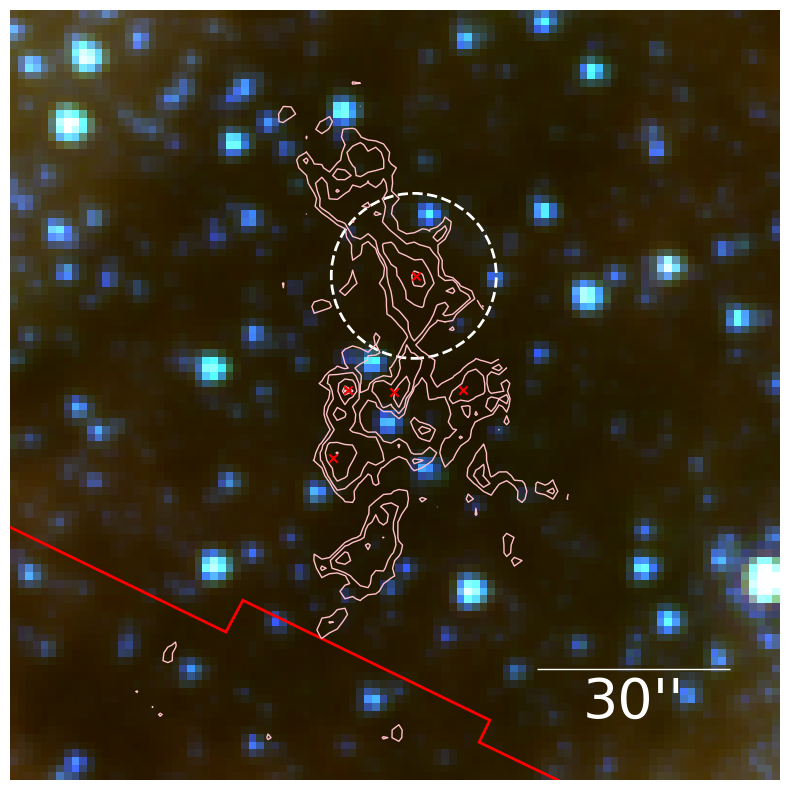

In [358]:
rrr, wwww = get_spitzer_3color(position_clD3, 2*u.arcmin, 2*u.arcmin)

plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=wwww)
ax.imshow(rrr)#, origin='lower')

pixel_region = reg[0].to_pixel(wwww)
pixel_region.plot(color='red')

hdu = fits.open('/orange/adamginsburg/jwst/cloudc/alma/danwalker/cloudd-12m7msd-newcasa.fits')[0]
array, footprint = reproject.reproject_interp(hdu, wwww)

reg_circ.to_pixel(wwww).plot(color='white', linestyle='--', linewidth=2)
ax.contour(array,
           levels=get_percentile_list(array),
           colors='pink', linewidths=1)

yso_cloudd = [position_clD1, position_clD2, position_clD3, position_clD4, position_clD5]

for yso in yso_cloudd:
    ax.scatter(yso.to_pixel(wwww)[0], yso.to_pixel(wwww)[1], color='red', marker='x', zorder=2)

add_scalebar(ax, u.Quantity(30*u.arcsec), label="30''", color='white', fontproperties={"size": 40})

ax.set_axis_off()
ax.set_ylabel('Galactic Latitude', fontsize=16)
ax.set_xlabel('Galactic Longitude', fontsize=16)

plt.savefig('/orange/adamginsburg/jwst/cloudc/code/proposals/2024/cloudd_3color.pdf', bbox_inches='tight')

# Three Filters

In [6]:
ls /orange/adamginsburg/jwst/cloudc/images/*fortricolor*

/orange/adamginsburg/jwst/cloudc/images/F182_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F212_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F410_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F466_reproj_merged-fortricolor.fits


In [118]:
## HMSFR
#position = SkyCoord('17:46:21.4695266413', '-28:35:38.2082071644', unit=(u.hourangle, u.deg))
## YSO Candidate 1
#position = SkyCoord('17:46:18.3784399622', '-28:38:23.6340539472', unit=(u.hourangle, u.deg))
## YSO Candidate 2
#position = SkyCoord('17:46:16.6406193258', '-28:38:31.8976718744', unit=(u.hourangle, u.deg))
## Weird diffuse HII region
#position = SkyCoord('17:46:20.8338845477', '-28:33:45.2123645404', unit=(u.hourangle, u.deg))
## Filament
#position = SkyCoord('17:46:19.5974715717', '-28:38:08.1425055611', unit=(u.hourangle, u.deg), frame='icrs')
#position = SkyCoord('17:46:18.9080445728', '-28:37:43.2668002383', unit=(u.hourangle, u.deg))
#position = SkyCoord('17:46:20.8032323396', '-28:33:45.2838234425', unit=(u.hourangle, u.deg))

## Smudge
#position = SkyCoord('17:46:23.6165518320', '-28:36:43.1017355842', unit=(u.hourangle, u.deg))

## Smudge v2????
#position = SkyCoord('17:46:21.8689517528', '-28:35:25.9231762520', unit=(u.hourangle, u.deg))

## Weird F212N Excess Star
#position = SkyCoord('17:46:21.4522435844', '-28:35:23.5372405866', unit=(u.hourangle, u.deg))

## Weird F212N Excess Star 2
#position = SkyCoord('17:46:21.2923113597', '-28:35:30.6910194382', unit=(u.hourangle, u.deg))

position = SkyCoord('17:46:21.7179816771', '-28:35:20.9763865686', unit=(u.hourangle, u.deg))

In [119]:
l = 10*u.arcsec#2*u.arcmin# 20*u.arcsec#
w = 10*u.arcsec#1.5*u.arcmin# 20*u.arcsec#

In [120]:
filename = '/orange/adamginsburg/jwst/cloudc/images/F466_reproj_merged-fortricolor.fits'
#'/orange/adamginsburg/jwst/cloudc/images/F405_minus_F410cont_merged-reproject_theoretical_bandwidth.fits'
#
cutout_R = get_cutout(filename, position, l, w)

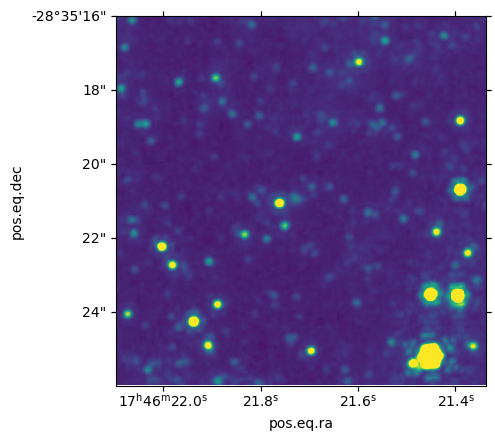

In [121]:
ax = plt.subplot(111, projection=cutout_R.wcs)
ax.imshow(np.nan_to_num(cutout_R.data), vmin=0, vmax=50)

In [122]:
filename = '/orange/adamginsburg/jwst/cloudc/images/F212_reproj_merged-fortricolor.fits'
#'/orange/adamginsburg/jwst/cloudc/images/F405_minus_F410cont_merged-reproject_theoretical_bandwidth.fits'
#
cutout_G = get_cutout(filename, position, l, w)

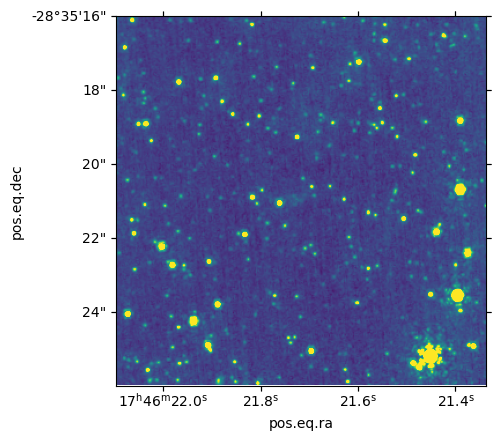

In [123]:
ax = plt.subplot(111, projection=cutout_G.wcs)
ax.imshow(np.nan_to_num(cutout_G.data), vmin=0, vmax=50)

In [124]:
filename = '/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits'
cutout_B = get_cutout(filename, position, l, w)

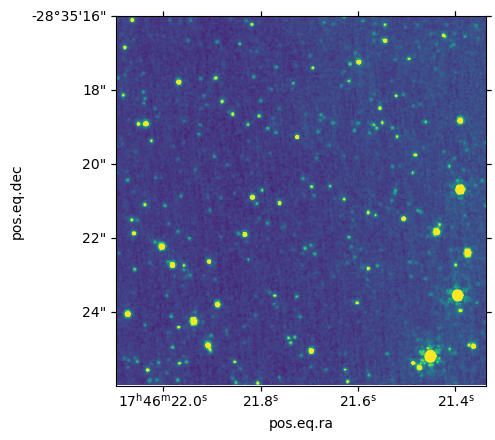

In [125]:
ax = plt.subplot(111, projection=cutout_B.wcs)
ax.imshow(np.nan_to_num(cutout_B.data), vmin=0, vmax=50)

In [126]:
rgb = np.array(
    [
        cutout_R.data,
        cutout_G.data,
        cutout_B.data
    ]
).swapaxes(0,2).swapaxes(0,1)

In [85]:
#reg = regions.RectangleSkyRegion(center=position, width=l, height=w)

## continuum
#filename = '/orange/adamginsburg/jwst/cloudc/alma/member.uid___A001_X1590_X282a.CloudC_sci.spw29.mfs.I.manual.image.pbcor.fits'

# ACES continuum
#filename = '/orange/adamginsburg/ACES/rawdata/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X1a8/calibrated/working/uid___A001_X15a0_X1a8.s10_0.Sgr_A_star_sci.spw25_27_29_31_33_35.cont.I.iter1.image.tt0.pbcor.fits'
filename = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0'

## moment map filament
#filename = '/orange/adamginsburg/jwst/cloudc/alma/smaller_cutouts/cube_HNCO_filament.fits'



cutout_radio = get_cutout(filename, position, l, w, format='casa')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [86]:
SpectralCube.read(filename, format='casa').beam

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Beam: BMAJ=1.4985976219177246 arcsec BMIN=0.9411970973014832 arcsec BPA=-73.72091674804688 deg

In [87]:
def get_percentile_list(data):
    percents = [90, 95, 99, 99.5, 99.9]
    #[87, 95, 99, 99.5, 99.9, 99.99]
    arr = []
    for per in percents:
        arr.append(np.nanpercentile(data, per))
    return np.array(arr)

#mom0.data
#get_percentile_list(cutout_radio.data)

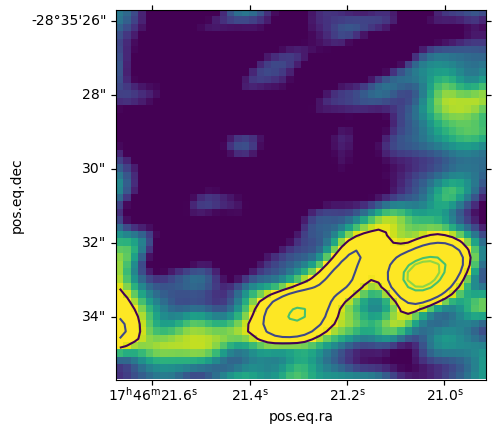

In [88]:
ax = plt.subplot(111, projection=cutout_radio.wcs)
ax.imshow(np.nan_to_num(cutout_radio.data), vmin=0, vmax=0.0005)
ax.contour(cutout_radio.data, levels=get_percentile_list(cutout_radio.data))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


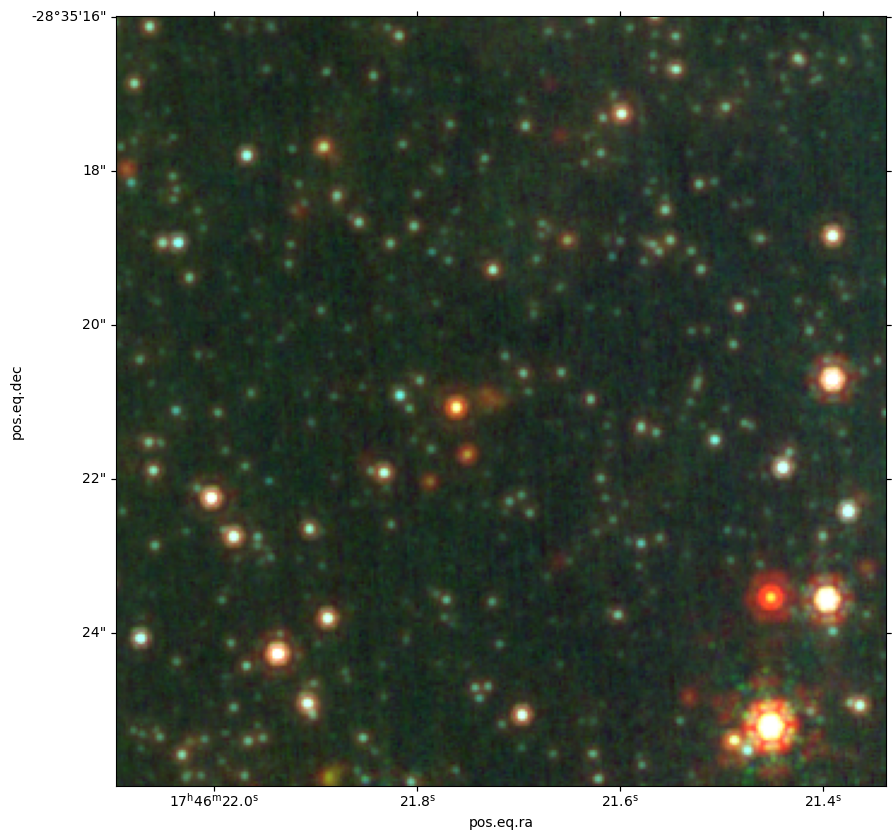

In [127]:
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=1, max_cut=100)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=1, max_cut=150)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_cut=1, max_cut=200)(rgb[:,:,2]),
]).swapaxes(0,2).swapaxes(0,1)
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=cutout_B.wcs)
ax.imshow(rgb_scaled)#, origin='lower')
#ax.contour(cutout_radio.data, transform=ax.get_transform(cutout_radio.wcs), 
#           levels=get_percentile_list(cutout_radio.data), colors='white', linewidths=1.)
#regions.CircleSkyRegion(position, radius=0.5*u.arcsec).to_pixel(wcs=cutout_B.wcs).plot(color='red', linestyle='--', linewidth=1)
#regions.CircleSkyRegion(SkyCoord('17:46:21.6620990165', '-28:35:23.1904135083', unit=(u.hourangle, u.deg)), radius=0.5*u.arcsec).to_pixel(wcs=cutout_B.wcs).plot(color='red', linestyle='--', linewidth=1)
#regions.CircleSkyRegion(SkyCoord('17:46:21.7243819140', '-28:35:20.9407513597', unit=(u.hourangle, u.deg)), radius=0.5*u.arcsec).to_pixel(wcs=cutout_B.wcs).plot(color='red', linestyle='--', linewidth=1)
ax.set_xticks([]);
ax.set_yticks([]);

# Two Filters

In [90]:
def get_cutout_rgb(position, l, w):
    #filename_R = '/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits'
    filename_R = '/orange/adamginsburg/jwst/cloudc/images/F466_reproj_merged-fortricolor.fits'
    #filename_B = '/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits'
    filename_B = '/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits'
    cutout_R = get_cutout(filename_R, position, l, w)
    cutout_B = get_cutout(filename_B, position, l, w)
    cutout_G = cutout_R.data + cutout_B.data
    rgb = np.array(
        [
            cutout_R.data,
            cutout_G,
            cutout_B.data
        ]
    ).swapaxes(0,2).swapaxes(0,1)
    rgb_scaled = np.array([
        simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb[:,:,0]),
        simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-2, max_cut=210)(rgb[:,:,1]),
        simple_norm(rgb[:,:,2], stretch='asinh', min_cut=-1, max_cut=120)(rgb[:,:,2]),
    ]).swapaxes(0,2)
    return rgb_scaled.swapaxes(0,1), cutout_R.wcs

def get_cutout_212_182(position, l, w):
    #filename_R = '/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits'
    filename_R = '/orange/adamginsburg/jwst/cloudc/images/F212_reproj_merged-fortricolor.fits'
    #filename_B = '/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits'
    filename_B = '/orange/adamginsburg/jwst/cloudc/images/F182_reproj_merged-fortricolor.fits'
    cutout_R = get_cutout(filename_R, position, l, w)
    cutout_B = get_cutout(filename_B, position, l, w)
    cutout_G = cutout_R.data + cutout_B.data
    rgb = np.array(
        [
            cutout_R.data,
            cutout_G,
            cutout_B.data
        ]
    ).swapaxes(0,2).swapaxes(0,1)
    rgb_scaled = np.array([
        simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb[:,:,0]),
        simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-2, max_cut=210)(rgb[:,:,1]),
        simple_norm(rgb[:,:,2], stretch='asinh', min_cut=-1, max_cut=120)(rgb[:,:,2]),
    ]).swapaxes(0,2)
    return rgb_scaled.swapaxes(0,1), cutout_R.wcs

## HMSFR

In [360]:
position = SkyCoord('17:46:21.4695266413', '-28:35:38.2082071644', unit=(u.hourangle, u.deg))
l = 0.25 * u.arcmin
w = 0.25 * u.arcmin
rgb_hmsfr, ww_hmsfr = get_cutout_rgb(position, l, w)
#reg_cloudc = regions.RectangleSkyRegion(center=position, width=l, height=w)
#crds_in = crds_ref[reg_cloudc.contains(crds_ref, wcs=ww)]

In [361]:
## continuum
filename = '/orange/adamginsburg/jwst/cloudc/alma/member.uid___A001_X1590_X282a.CloudC_sci.spw29.mfs.I.manual.image.pbcor.fits'
l = 0.23 * u.arcmin
w = 0.23 * u.arcmin
cutout_radio = get_cutout(filename, position, l, w)

In [362]:
def get_percentile_list(data):
    percents = [98, 99, 99.9, 99.99]
    #[87, 95, 99, 99.5, 99.9, 99.99]
    arr = []
    for per in percents:
        arr.append(np.nanpercentile(data, per))
    return np.array(arr)

def get_step_list(data, N=5, multiplier=0.5):
    std = np.nanstd(data)
    mean = np.nanmean(data)
    #start = mean + 5*std
    start = mean + 1.*std
    step = 4*std
    arr = [multiplier*step*i + start for i in range(N)]
    return np.array(arr)

#mom0.data
#get_percentile_list(cutout_radio.data)

In [363]:
get_step_list(cutout_radio.data)

array([0.00141578, 0.0039632 , 0.00651063, 0.00905805, 0.01160548])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


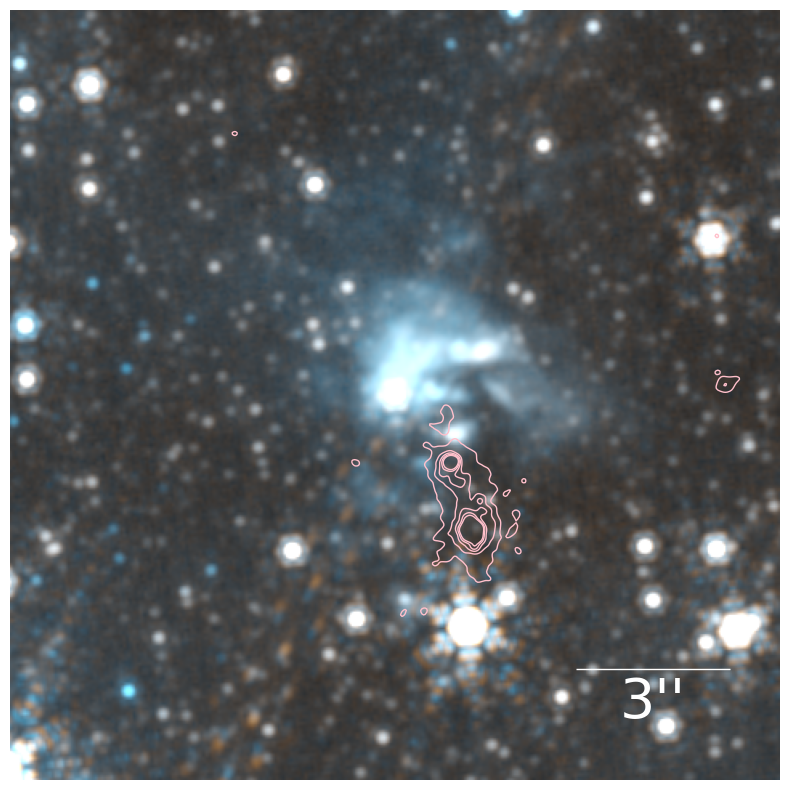

In [364]:
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=ww_hmsfr)#, origin='lower')
ax.imshow(rgb_hmsfr)
ax.contour(cutout_radio.data, transform=ax.get_transform(cutout_radio.wcs), 
           #levels=get_percentile_list(cutout_radio.data), 
           levels=get_step_list(cutout_radio.data),
           colors='pink', linewidths=1.)
#ax.scatter(crds_in.ra, crds_in.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'))
ax.set_axis_off()
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

add_scalebar(ax, u.Quantity(3*u.arcsec), label="3''", color='white', fontproperties={"size": 40})

plt.savefig('/orange/adamginsburg/jwst/cloudc/code/proposals/2024/hmsfr_2color_B6contours.pdf', bbox_inches='tight')

In [173]:
ls /orange/adamginsburg/jwst/cloudc/alma/moments/*SiO*

/orange/adamginsburg/jwst/cloudc/alma/moments/cube_SiO_B6_highv.fits
/orange/adamginsburg/jwst/cloudc/alma/moments/cube_SiO_B6_lowv.fits
/orange/adamginsburg/jwst/cloudc/alma/moments/cube_SiO_filament.fits
/orange/adamginsburg/jwst/cloudc/alma/moments/cube_SiO_mos_filament.fits
/orange/adamginsburg/jwst/cloudc/alma/moments/mom0_SiO_B6_highv.fits
/orange/adamginsburg/jwst/cloudc/alma/moments/mom0_SiO_B6_lowv.fits
/orange/adamginsburg/jwst/cloudc/alma/moments/mom0_SiO_filament.fits
/orange/adamginsburg/jwst/cloudc/alma/moments/mom0_SiO_mos_filament.fits


In [198]:
## SiO high v
filename = '/orange/adamginsburg/jwst/cloudc/alma/moments/mom0_SiO_B6_highv.fits'
l = 0.25 * u.arcmin
w = 0.25 * u.arcmin
cutout_radio_sio_highv = get_cutout(filename, position, l, w)

In [199]:
## SiO low v
filename = '/orange/adamginsburg/jwst/cloudc/alma/moments/mom0_SiO_B6_lowv.fits'
l = 0.25 * u.arcmin
w = 0.25 * u.arcmin
cutout_radio_sio_lowv = get_cutout(filename, position, l, w)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


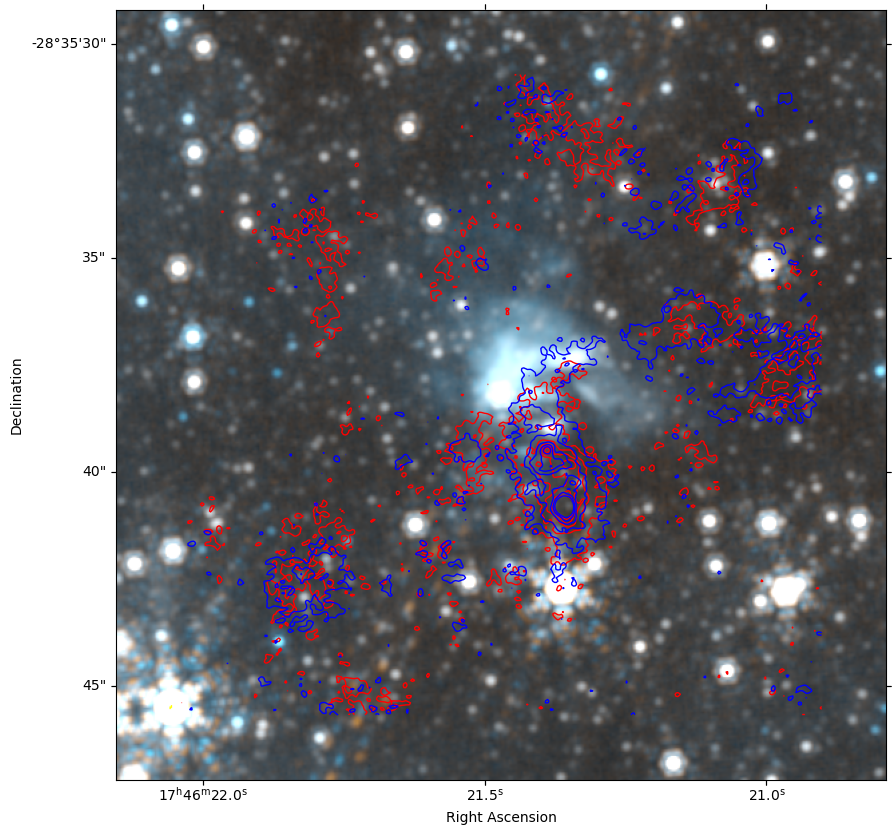

In [200]:
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=ww_hmsfr)#, origin='lower')
ax.imshow(rgb_hmsfr)
ax.contour(cutout_radio_sio_highv.data, transform=ax.get_transform(cutout_radio_sio_highv.wcs), 
           #levels=get_percentile_list(cutout_radio.data), 
           levels=get_step_list(cutout_radio_sio_highv.data),
           colors='red', linewidths=1.)
ax.contour(cutout_radio_sio_lowv.data, transform=ax.get_transform(cutout_radio_sio_lowv.wcs), 
           #levels=get_percentile_list(cutout_radio.data), 
           levels=get_step_list(cutout_radio_sio_lowv.data),
           colors='blue', linewidths=1.)
#ax.scatter(crds_in.ra, crds_in.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'))
plt.xticks([]);
plt.yticks([]);
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

## Smudge

In [365]:
## Smudge
position = SkyCoord('17:46:23.6165518320', '-28:36:43.1017355842', unit=(u.hourangle, u.deg))
l = 6 * u.arcsec
w = 6 * u.arcsec
rgb_smudge, ww_smudge = get_cutout_rgb(position, l, w)

In [366]:
filename = '/orange/adamginsburg/jwst/cloudc/alma/member.uid___A001_X1590_X282a.CloudC_sci.spw29.mfs.I.manual.image.pbcor.fits'
l = 5 * u.arcsec
w = 5 * u.arcsec
cutout_radio = get_cutout(filename, position, l, w)

In [367]:
# ACES continuum
filename = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0'
l = 5 * u.arcsec
w = 5 * u.arcsec
cutout_radio_ACES = get_cutout(filename, position, l, w, format='casa')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


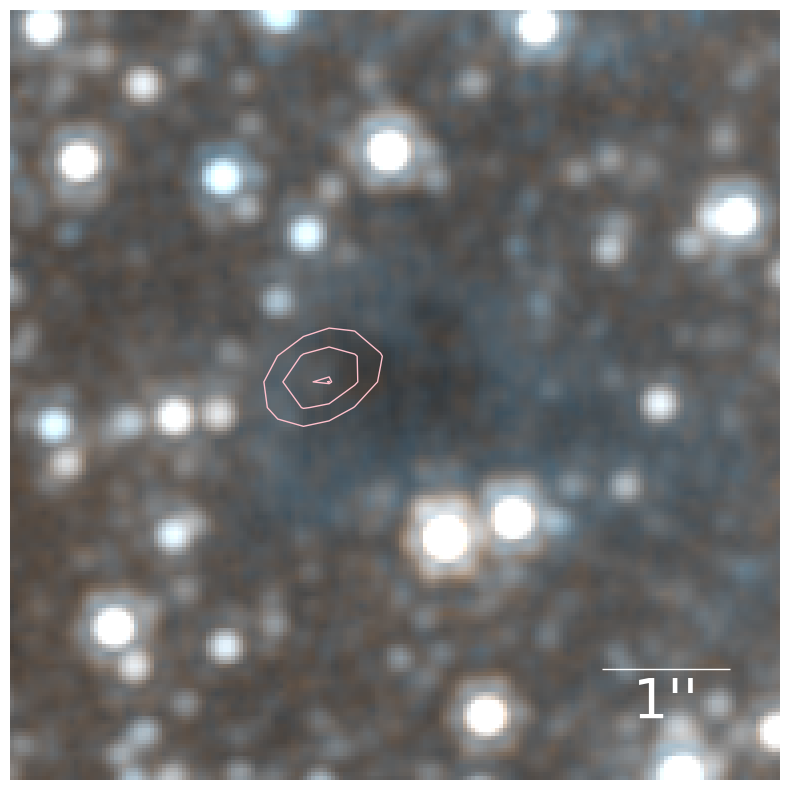

In [369]:
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=ww_smudge)#, origin='lower')
ax.imshow(rgb_smudge)
ax.contour(cutout_radio_ACES.data, transform=ax.get_transform(cutout_radio_ACES.wcs), 
           #levels=get_percentile_list(cutout_radio.data), 
           levels=get_percentile_list(cutout_radio_ACES.data),
           colors='pink', linewidths=1.)
#ax.contour(cutout_radio.data, transform=ax.get_transform(cutout_radio.wcs), 
#           #levels=get_percentile_list(cutout_radio.data), 
#           levels=get_percentile_list(cutout_radio.data),
#           colors='pink', linewidths=1.)
#ax.scatter(crds_in.ra, crds_in.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'))
ax.set_axis_off()
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

add_scalebar(ax, u.Quantity(1*u.arcsec), label="1''", color='white', fontproperties={"size": 40})

plt.savefig('/orange/adamginsburg/jwst/cloudc/code/proposals/2024/smudge_2color.pdf', bbox_inches='tight')
#plt.savefig('/orange/adamginsburg/jwst/cloudc/code/proposals/2024/smudge_2color_B6contours.pdf', bbox_inches='tight')

# F212N Excess

In [111]:
position = SkyCoord('17:46:21.4522435844', '-28:35:23.5372405866', unit=(u.hourangle, u.deg))
l = 6 * u.arcsec
w = 6 * u.arcsec
rgb_h2, ww_h2 = get_cutout_212_182(position, l, w)

In [112]:
# ACES continuum
filename = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0'
l = 5 * u.arcsec
w = 5 * u.arcsec
cutout_radio_ACES = get_cutout(filename, position, l, w, format='casa')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


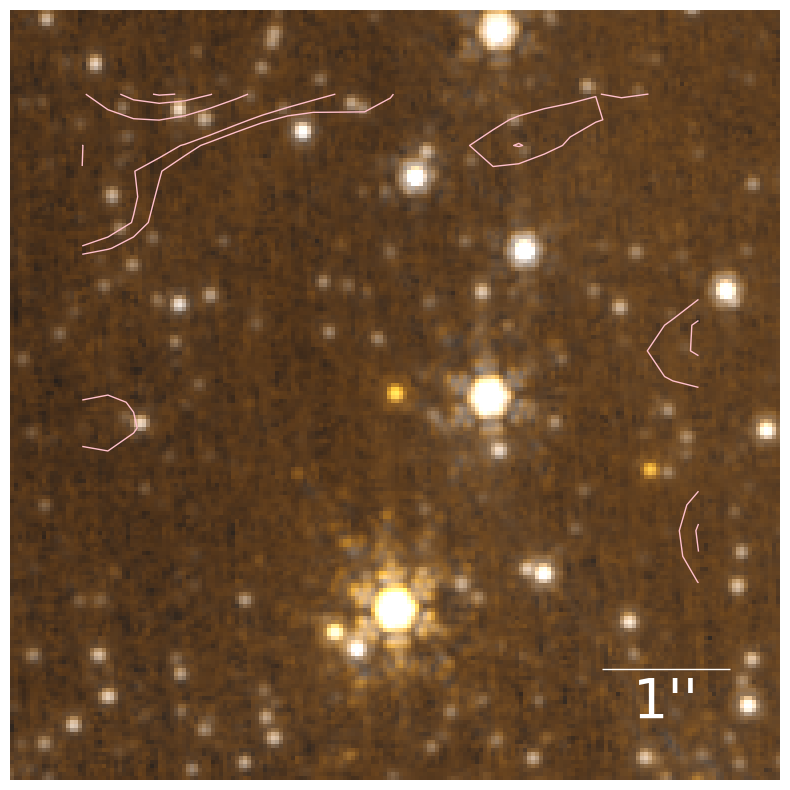

In [113]:
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=ww_h2)#, origin='lower')
ax.imshow(rgb_h2)

ax.contour(cutout_radio_ACES.data, transform=ax.get_transform(cutout_radio_ACES.wcs), 
           #levels=get_percentile_list(cutout_radio.data), 
           levels=get_percentile_list(cutout_radio_ACES.data),
           colors='pink', linewidths=1.)

ax.set_axis_off()
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

add_scalebar(ax, u.Quantity(1*u.arcsec), label="1''", color='white', fontproperties={"size": 40})

In [114]:
position = SkyCoord('17:46:21.2923113597', '-28:35:30.6910194382', unit=(u.hourangle, u.deg))
l = 6 * u.arcsec
w = 6 * u.arcsec
rgb_h2, ww_h2 = get_cutout_212_182(position, l, w)

In [115]:
# ACES continuum
filename = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0'
l = 5 * u.arcsec
w = 5 * u.arcsec
cutout_radio_ACES = get_cutout(filename, position, l, w, format='casa')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


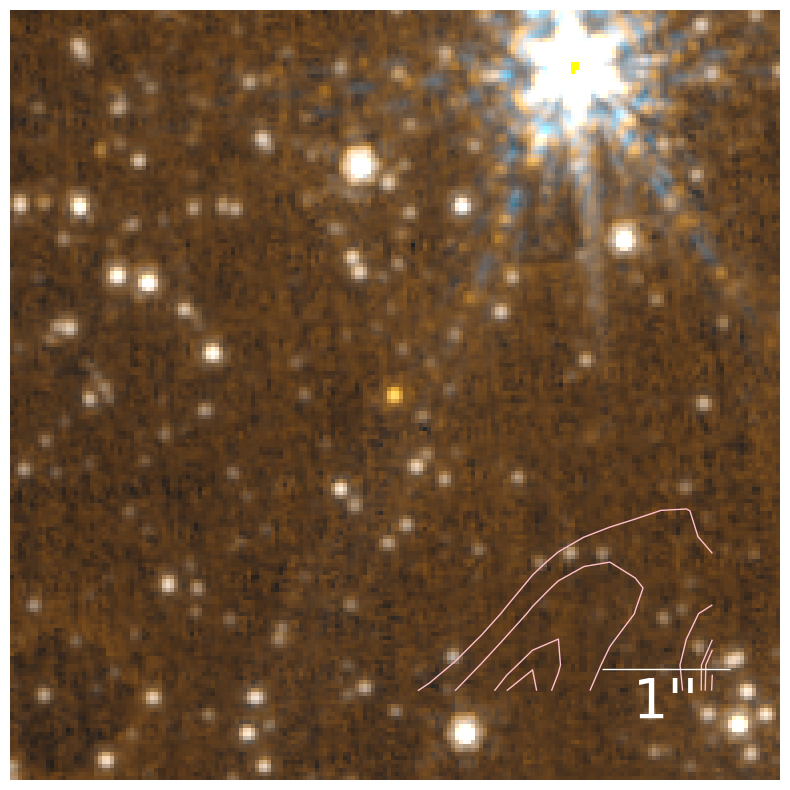

In [116]:
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=ww_h2)#, origin='lower')
ax.imshow(rgb_h2)

ax.contour(cutout_radio_ACES.data, transform=ax.get_transform(cutout_radio_ACES.wcs), 
           #levels=get_percentile_list(cutout_radio.data), 
           levels=get_percentile_list(cutout_radio_ACES.data),
           colors='pink', linewidths=1.)

ax.set_axis_off()
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

add_scalebar(ax, u.Quantity(1*u.arcsec), label="1''", color='white', fontproperties={"size": 40})